In [1]:
#import necessary libraries
import numpy as np
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OrdinalEncoder
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score
from sklearn.model_selection import RandomizedSearchCV
import joblib

In [2]:
df = pd.read_csv(r'/workspaces/Mental_Health_Prediction_in_Tech/datasets/survey.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1259 entries, 0 to 1258
Data columns (total 27 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Timestamp                  1259 non-null   object
 1   Age                        1259 non-null   int64 
 2   Gender                     1259 non-null   object
 3   Country                    1259 non-null   object
 4   state                      744 non-null    object
 5   self_employed              1241 non-null   object
 6   family_history             1259 non-null   object
 7   treatment                  1259 non-null   object
 8   work_interfere             995 non-null    object
 9   no_employees               1259 non-null   object
 10  remote_work                1259 non-null   object
 11  tech_company               1259 non-null   object
 12  benefits                   1259 non-null   object
 13  care_options               1259 non-null   object
 14  wellness

In [4]:
df['supervisor'].value_counts()

supervisor
Yes             516
No              393
Some of them    350
Name: count, dtype: int64

In [5]:
df.describe()

,Age
count,1.259000e+03
mean,7.942815e+07
std,2.818299e+09
min,-1.726000e+03
25%,2.700000e+01
50%,3.100000e+01
75%,3.600000e+01
max,1.000000e+11


#### Data preprocessing

In [6]:
print(df.isnull().sum())

Timestamp                       0
Age                             0
Gender                          0
Country                         0
state                         515
self_employed                  18
family_history                  0
treatment                       0
work_interfere                264
no_employees                    0
remote_work                     0
tech_company                    0
benefits                        0
care_options                    0
wellness_program                0
seek_help                       0
anonymity                       0
leave                           0
mental_health_consequence       0
phys_health_consequence         0
coworkers                       0
supervisor                      0
mental_health_interview         0
phys_health_interview           0
mental_vs_physical              0
obs_consequence                 0
comments                     1095
dtype: int64


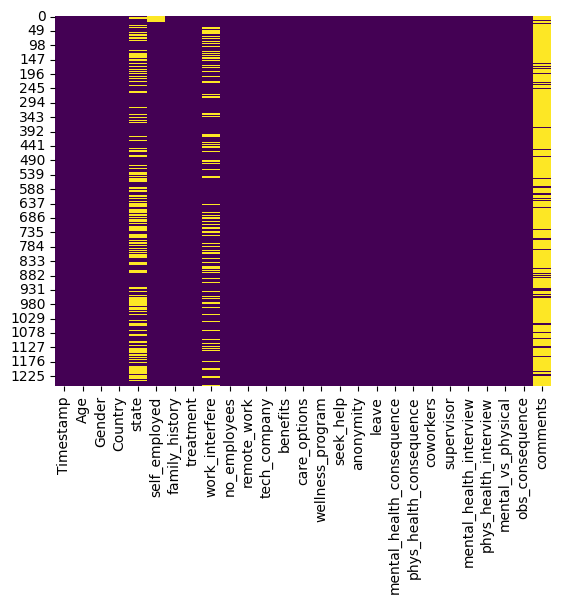

<Figure size 640x480 with 0 Axes>

In [7]:
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.show()
plt.savefig("Visualization of missing values.png")

In [8]:
df = df.drop(columns=['Timestamp', 'Country', 'state', 'comments'])
print(df.isnull().sum())

Age                            0
Gender                         0
self_employed                 18
family_history                 0
treatment                      0
work_interfere               264
no_employees                   0
remote_work                    0
tech_company                   0
benefits                       0
care_options                   0
wellness_program               0
seek_help                      0
anonymity                      0
leave                          0
mental_health_consequence      0
phys_health_consequence        0
coworkers                      0
supervisor                     0
mental_health_interview        0
phys_health_interview          0
mental_vs_physical             0
obs_consequence                0
dtype: int64


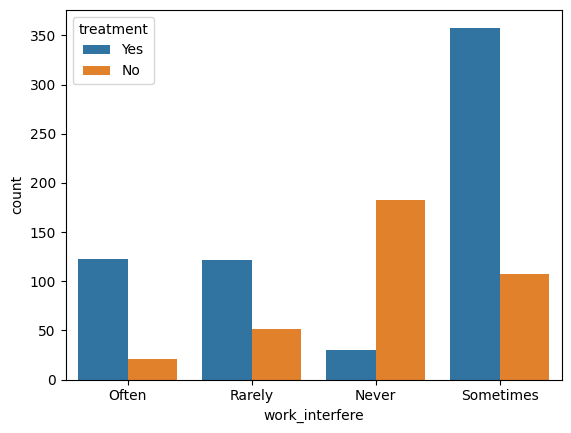

In [9]:
sns.countplot(x='work_interfere', hue='treatment', data=df)
plt.savefig("treatment based on work interfere.png")
plt.show()

In [10]:
df[['self_employed','work_interfere']].dtypes
df['self_employed'].value_counts()
df['work_interfere'].value_counts()

work_interfere
Sometimes    465
Never        213
Rarely       173
Often        144
Name: count, dtype: int64

In [11]:
df['self_employed'] = df['self_employed'].fillna(df['self_employed'].mode()[0])
df['work_interfere'] = df['work_interfere'].fillna(df['work_interfere'].mode()[0])

In [12]:
print(df.isnull().sum())

Age                          0
Gender                       0
self_employed                0
family_history               0
treatment                    0
work_interfere               0
no_employees                 0
remote_work                  0
tech_company                 0
benefits                     0
care_options                 0
wellness_program             0
seek_help                    0
anonymity                    0
leave                        0
mental_health_consequence    0
phys_health_consequence      0
coworkers                    0
supervisor                   0
mental_health_interview      0
phys_health_interview        0
mental_vs_physical           0
obs_consequence              0
dtype: int64


In [13]:
df.duplicated().sum()

4

In [14]:
df=df.drop_duplicates()

In [15]:
# Encoding the categorical variables
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns
categorical_cols = df.select_dtypes(include=['object']).columns

In [16]:
numerical_cols

Index(['Age'], dtype='object')

In [17]:
categorical_cols

Index(['Gender', 'self_employed', 'family_history', 'treatment',
       'work_interfere', 'no_employees', 'remote_work', 'tech_company',
       'benefits', 'care_options', 'wellness_program', 'seek_help',
       'anonymity', 'leave', 'mental_health_consequence',
       'phys_health_consequence', 'coworkers', 'supervisor',
       'mental_health_interview', 'phys_health_interview',
       'mental_vs_physical', 'obs_consequence'],
      dtype='object')

#### Feature Engineering 

In [18]:
df['Age'].unique()

array([         37,          44,          32,          31,          33,
                35,          39,          42,          23,          29,
                36,          27,          46,          41,          34,
                30,          40,          38,          50,          24,
                18,          28,          26,          22,          19,
                25,          45,          21,         -29,          43,
                56,          60,          54,         329,          55,
       99999999999,          48,          20,          57,          58,
                47,          62,          51,          65,          49,
             -1726,           5,          53,          61,           8,
                11,          -1,          72], dtype=int64)

In [19]:
df['Age'] = df['Age'].apply(lambda x: np.nan if x < 0 else x)
df['Age'] = df['Age'].apply(lambda x: np.nan if x > 120 else x)
df['Age'] = df['Age'].fillna(df['Age'].median())

In [20]:
df['Age'].unique()

array([37., 44., 32., 31., 33., 35., 39., 42., 23., 29., 36., 27., 46.,
       41., 34., 30., 40., 38., 50., 24., 18., 28., 26., 22., 19., 25.,
       45., 21., 43., 56., 60., 54., 55., 48., 20., 57., 58., 47., 62.,
       51., 65., 49.,  5., 53., 61.,  8., 11., 72.])

In [21]:
df['Gender'] = df['Gender'].fillna('Unknown').astype(str).str.lower().str.strip()

In [22]:
# Replace categories for 'Male'
df['Gender'] = df['Gender'].replace(['male ', 'male', 'm', 'cis male', 'man', 'cis male', 'mail', 'male-ish', 'male (cis)', 
                                              'cis man', 'msle', 'malr', 'mal', 'maile', 'make'], 'male')

In [23]:
# Replace categories for 'Female'
df['Gender'] = df['Gender'].replace(['female ', 'female', 'f', 'f', 'woman', 'female', 'femail', 'cis female', 'cis-female/femme', 
                                              'femake', 'female (cis)', 'woman'], 'female')

In [24]:
# Replace categories for 'Trans' (ensure both lower and mixed case are handled)
df['Gender'] = df["Gender"].replace(['female (trans)', 'queer/she/they', 'non-binary', 'fluid', 'queer', 'androgyne', 'trans-female', 
                                              'male leaning androgynous', 'agender', 'a little about you', 'nah', 'all', 
                                              'ostensibly male, unsure what that really means', 'genderqueer', 'enby', 'p', 'neuter', 
                                              'something kinda male?', 'guy (-ish) ^_^', 'trans woman'], 'trans')

In [25]:
df['Gender'].unique()

array(['female', 'male', 'trans'], dtype=object)

In [26]:
# List of columns you want to check unique values for
columns = ['self_employed', 'family_history', 'treatment', 'work_interfere', 
           'no_employees', 'remote_work', 'tech_company', 'benefits', 
           'care_options', 'wellness_program', 'seek_help', 'anonymity', 
           'leave', 'mental_health_consequence', 'phys_health_consequence', 
           'coworkers', 'supervisor', 'mental_health_interview', 
           'phys_health_interview', 'mental_vs_physical', 'obs_consequence']

# Loop through each column and print its unique values
for col in columns:
    print(f"Unique values for {col}:")
    print(df[col].unique())
    print("\n")

Unique values for self_employed:
['No' 'Yes']


Unique values for family_history:
['No' 'Yes']


Unique values for treatment:
['Yes' 'No']


Unique values for work_interfere:
['Often' 'Rarely' 'Never' 'Sometimes']


Unique values for no_employees:
['6-25' 'More than 1000' '26-100' '100-500' '1-5' '500-1000']


Unique values for remote_work:
['No' 'Yes']


Unique values for tech_company:
['Yes' 'No']


Unique values for benefits:
['Yes' "Don't know" 'No']


Unique values for care_options:
['Not sure' 'No' 'Yes']


Unique values for wellness_program:
['No' "Don't know" 'Yes']


Unique values for seek_help:
['Yes' "Don't know" 'No']


Unique values for anonymity:
['Yes' "Don't know" 'No']


Unique values for leave:
['Somewhat easy' "Don't know" 'Somewhat difficult' 'Very difficult'
 'Very easy']


Unique values for mental_health_consequence:
['No' 'Maybe' 'Yes']


Unique values for phys_health_consequence:
['No' 'Yes' 'Maybe']


Unique values for coworkers:
['Some of them' 'No' 'Yes']


U

<Figure size 1200x800 with 0 Axes>

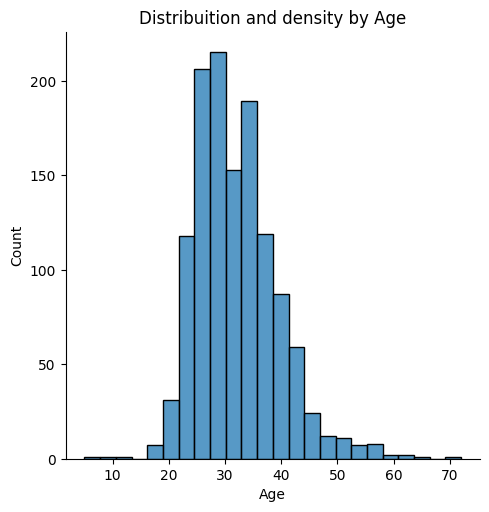

In [27]:
plt.figure(figsize=(12,8))
sns.displot(df["Age"], bins=24)
plt.title("Distribuition and density by Age")
plt.xlabel("Age")
plt.savefig("Distribuition and density by Age.png")
plt.show()

#### Encoding Categorical Data

In [28]:
# Apply Label Encoding
columns_to_encode = ['Gender', 'self_employed', 'family_history', 'treatment', 'remote_work', 'benefits',
                     'tech_company', 'mental_health_consequence', 'phys_health_consequence', 'care_options',
                     'wellness_program', 'obs_consequence', 'seek_help', 'anonymity', 'coworkers', 'supervisor',
                     'mental_health_interview', 'phys_health_interview', 'mental_vs_physical']

In [29]:
le = LabelEncoder()
for column in columns_to_encode:
    df[column] = le.fit_transform(df[column])

In [30]:
# Ordinal Encoding 
ordinal_columns_encode= {
    'work_interfere': ['Never', 'Rarely', 'Sometimes', 'Often'],
    'leave': ["Don't know", 'Very difficult', 'Somewhat difficult', 'Somewhat easy', 'Very easy'],
    'no_employees': ['1-5', '6-25', '26-100', '100-500', '500-1000', 'More than 1000']
}
ordinal_encoder = OrdinalEncoder(categories=list(ordinal_columns_encode.values()))

In [31]:
df.head()

,Age,Gender,self_employed,family_history,treatment,work_interfere,no_employees,remote_work,tech_company,benefits,...,anonymity,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence
0,37.0,0,0,0,1,Often,6-25,0,1,2,...,2,Somewhat easy,1,1,1,2,1,0,2,0
1,44.0,1,0,0,0,Rarely,More than 1000,0,0,0,...,0,Don't know,0,1,0,0,1,1,0,0
2,32.0,1,0,0,0,Rarely,6-25,0,1,1,...,0,Somewhat difficult,1,1,2,2,2,2,1,0
3,31.0,1,0,1,1,Often,26-100,0,1,1,...,1,Somewhat difficult,2,2,1,0,0,0,1,1
4,31.0,1,0,0,0,Never,100-500,1,1,2,...,0,Don't know,1,1,1,2,2,2,0,0


In [32]:
# Apply Ordinal Encoding
df[list(ordinal_columns_encode.keys())] = ordinal_encoder.fit_transform(df[list(ordinal_columns_encode.keys())]).astype(int)

In [33]:
df

,Age,Gender,self_employed,family_history,treatment,work_interfere,no_employees,remote_work,tech_company,benefits,...,anonymity,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence
0,37.0,0,0,0,1,3,1,0,1,2,...,2,3,1,1,1,2,1,0,2,0
1,44.0,1,0,0,0,1,5,0,0,0,...,0,0,0,1,0,0,1,1,0,0
2,32.0,1,0,0,0,1,1,0,1,1,...,0,2,1,1,2,2,2,2,1,0
3,31.0,1,0,1,1,3,2,0,1,1,...,1,2,2,2,1,0,0,0,1,1
4,31.0,1,0,0,0,0,3,1,1,2,...,0,0,1,1,1,2,2,2,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1254,26.0,1,0,0,1,2,2,0,1,1,...,0,3,1,1,1,1,1,1,0,0
1255,32.0,1,0,1,1,3,2,1,1,2,...,2,2,1,1,1,2,1,1,2,0
1256,34.0,1,0,1,1,2,5,0,1,2,...,0,2,2,2,0,0,1,1,1,0
1257,46.0,0,0,0,0,2,3,1,1,1,...,0,0,2,1,0,0,1,1,1,0


In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1255 entries, 0 to 1258
Data columns (total 23 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Age                        1255 non-null   float64
 1   Gender                     1255 non-null   int32  
 2   self_employed              1255 non-null   int32  
 3   family_history             1255 non-null   int32  
 4   treatment                  1255 non-null   int32  
 5   work_interfere             1255 non-null   int32  
 6   no_employees               1255 non-null   int32  
 7   remote_work                1255 non-null   int32  
 8   tech_company               1255 non-null   int32  
 9   benefits                   1255 non-null   int32  
 10  care_options               1255 non-null   int32  
 11  wellness_program           1255 non-null   int32  
 12  seek_help                  1255 non-null   int32  
 13  anonymity                  1255 non-null   int32  
 1

In [35]:
# Distribution of all the features 
numerical_columns = df.select_dtypes(include=['int32', 'float64']).columns

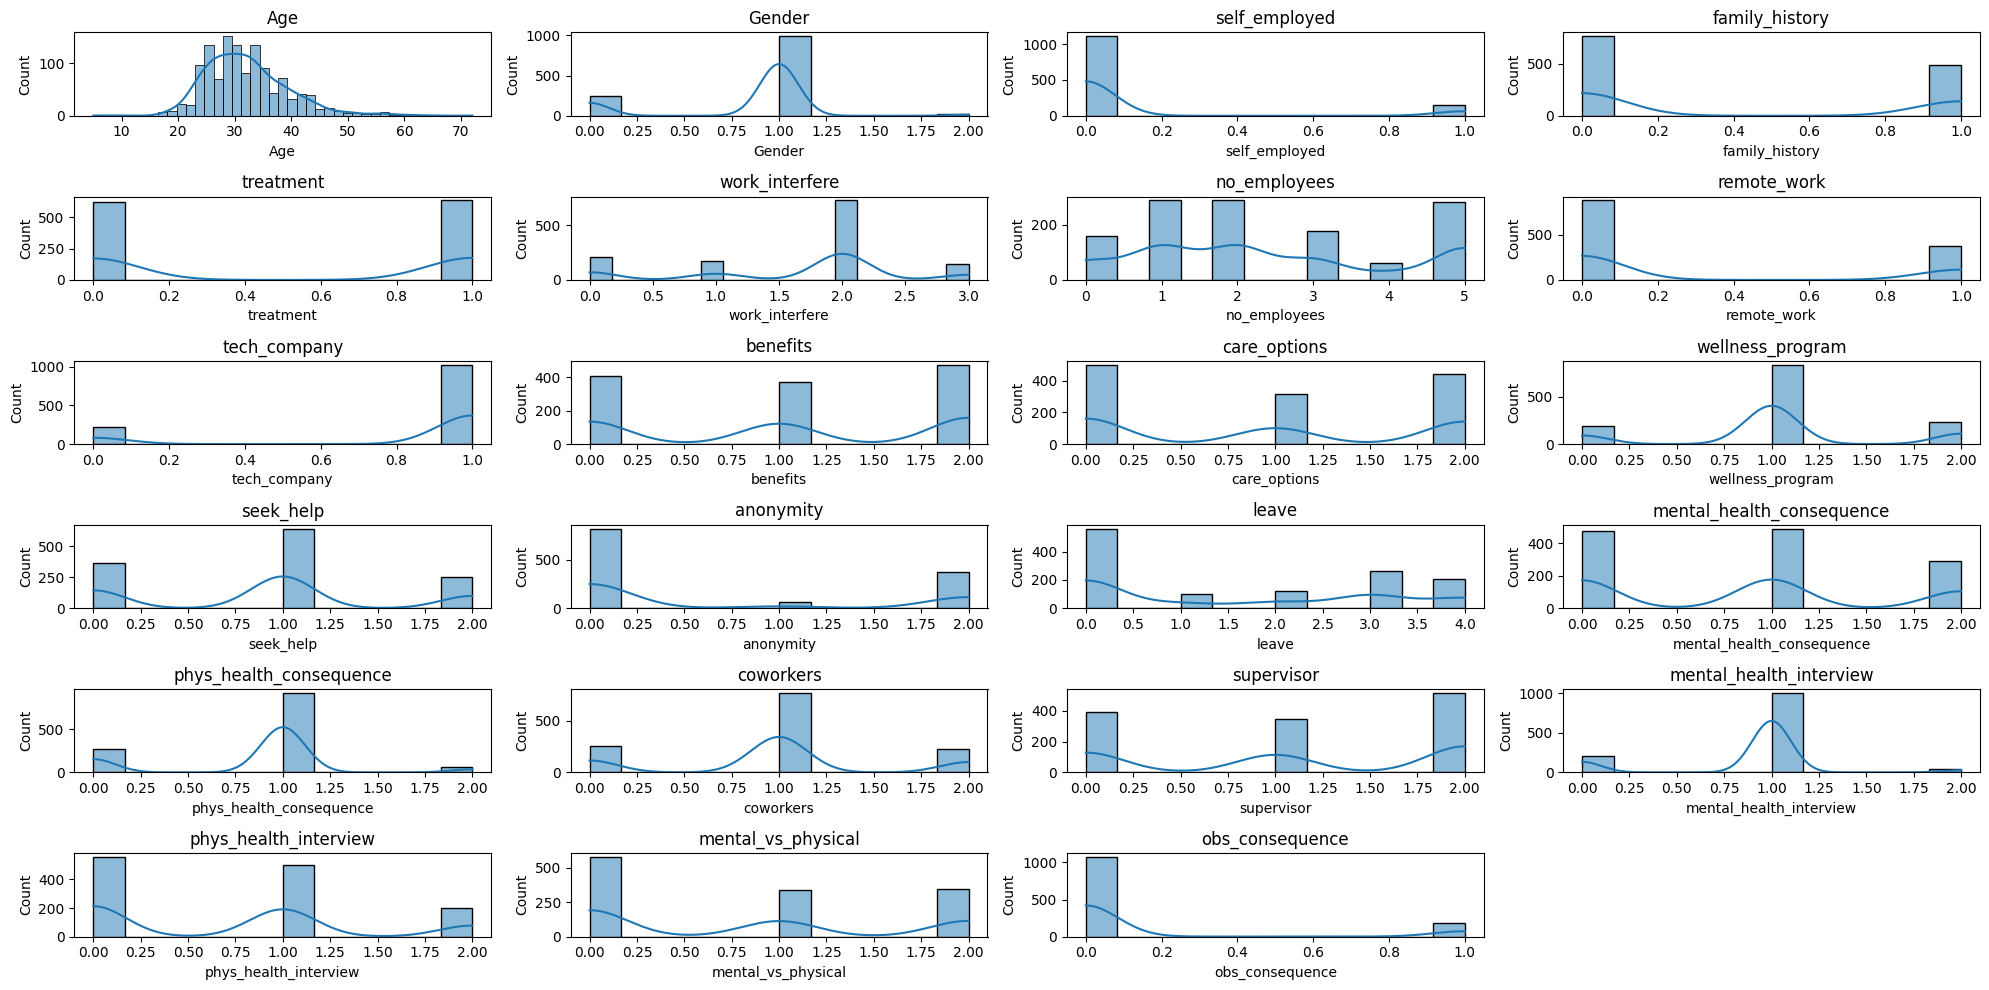

In [36]:
fig, axes = plt.subplots(
    nrows=(len(numerical_columns) + 3) // 4, ncols=4, figsize=(20, 10)
)
for ax, col in zip(axes.flatten(), numerical_columns):
    sns.histplot(df[col], kde=True, ax=ax)
    ax.set_title(f'{col}')
for ax in axes.flatten()[len(numerical_columns):]:
    ax.axis('off')
plt.tight_layout()
plt.savefig("Data Distribution for all the features.png")
plt.show()

In [37]:
correlation_matrix=df.corr()

In [38]:
correlation_matrix

,Age,Gender,self_employed,family_history,treatment,work_interfere,no_employees,remote_work,tech_company,benefits,...,anonymity,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence
Age,1.000000,0.047147,0.057559,0.008700,0.073633,-0.054232,0.121563,0.138017,-0.060270,0.153431,...,0.019022,-0.037895,0.021533,-0.060896,-0.017142,0.003012,0.053982,-0.026757,-0.023380,0.066615
Gender,0.047147,1.000000,0.053366,-0.121895,-0.144737,-0.045593,-0.068187,0.006989,0.063828,-0.088425,...,-0.013589,0.033643,0.037846,0.039202,0.056968,0.072096,-0.027051,-0.007580,-0.002151,-0.032072
self_employed,0.057559,0.053366,1.000000,0.007084,0.018115,0.045906,-0.393289,0.318636,0.079179,-0.050486,...,0.109906,0.143822,0.030838,0.026973,0.076046,0.037075,-0.001650,-0.024068,0.137180,0.083740
family_history,0.008700,-0.121895,0.007084,1.000000,0.375925,0.183288,0.027053,0.014958,-0.044005,0.128763,...,0.063940,0.026793,0.026875,0.003332,-0.001909,0.004247,0.046834,0.037498,0.039095,0.127500
treatment,0.073633,-0.144737,0.018115,0.375925,1.000000,0.304525,0.010098,0.026974,-0.029577,0.226499,...,0.143186,0.039209,0.029320,-0.008995,0.067311,-0.036333,0.100598,0.049844,0.060917,0.159889
work_interfere,-0.054232,-0.045593,0.045906,0.183288,0.304525,1.000000,-0.061385,0.040923,-0.018809,0.025502,...,0.067823,0.031565,0.046175,-0.029282,0.015382,-0.020896,0.038401,0.021674,0.021069,0.116752
no_employees,0.121563,-0.068187,-0.393289,0.027053,0.010098,-0.061385,1.000000,-0.241782,-0.255482,0.218123,...,0.012510,-0.152765,-0.003135,-0.043149,-0.131291,-0.096702,0.087004,0.053207,-0.050454,0.041544
remote_work,0.138017,0.006989,0.318636,0.014958,0.026974,0.040923,-0.241782,1.000000,0.131095,-0.061595,...,-0.003017,0.070390,0.056070,-0.011029,0.081829,0.023796,-0.030390,-0.013567,0.037122,-0.038577
tech_company,-0.060270,0.063828,0.079179,-0.044005,-0.029577,-0.018809,-0.255482,0.131095,1.000000,-0.045751,...,-0.049997,0.040524,0.003662,0.063913,0.076242,0.048081,-0.040225,-0.032086,0.029414,-0.063933
benefits,0.153431,-0.088425,-0.050486,0.128763,0.226499,0.025502,0.218123,-0.061595,-0.045751,1.000000,...,0.337267,0.078066,-0.009637,-0.028260,-0.006331,0.026049,0.037629,0.025660,0.139960,0.069889


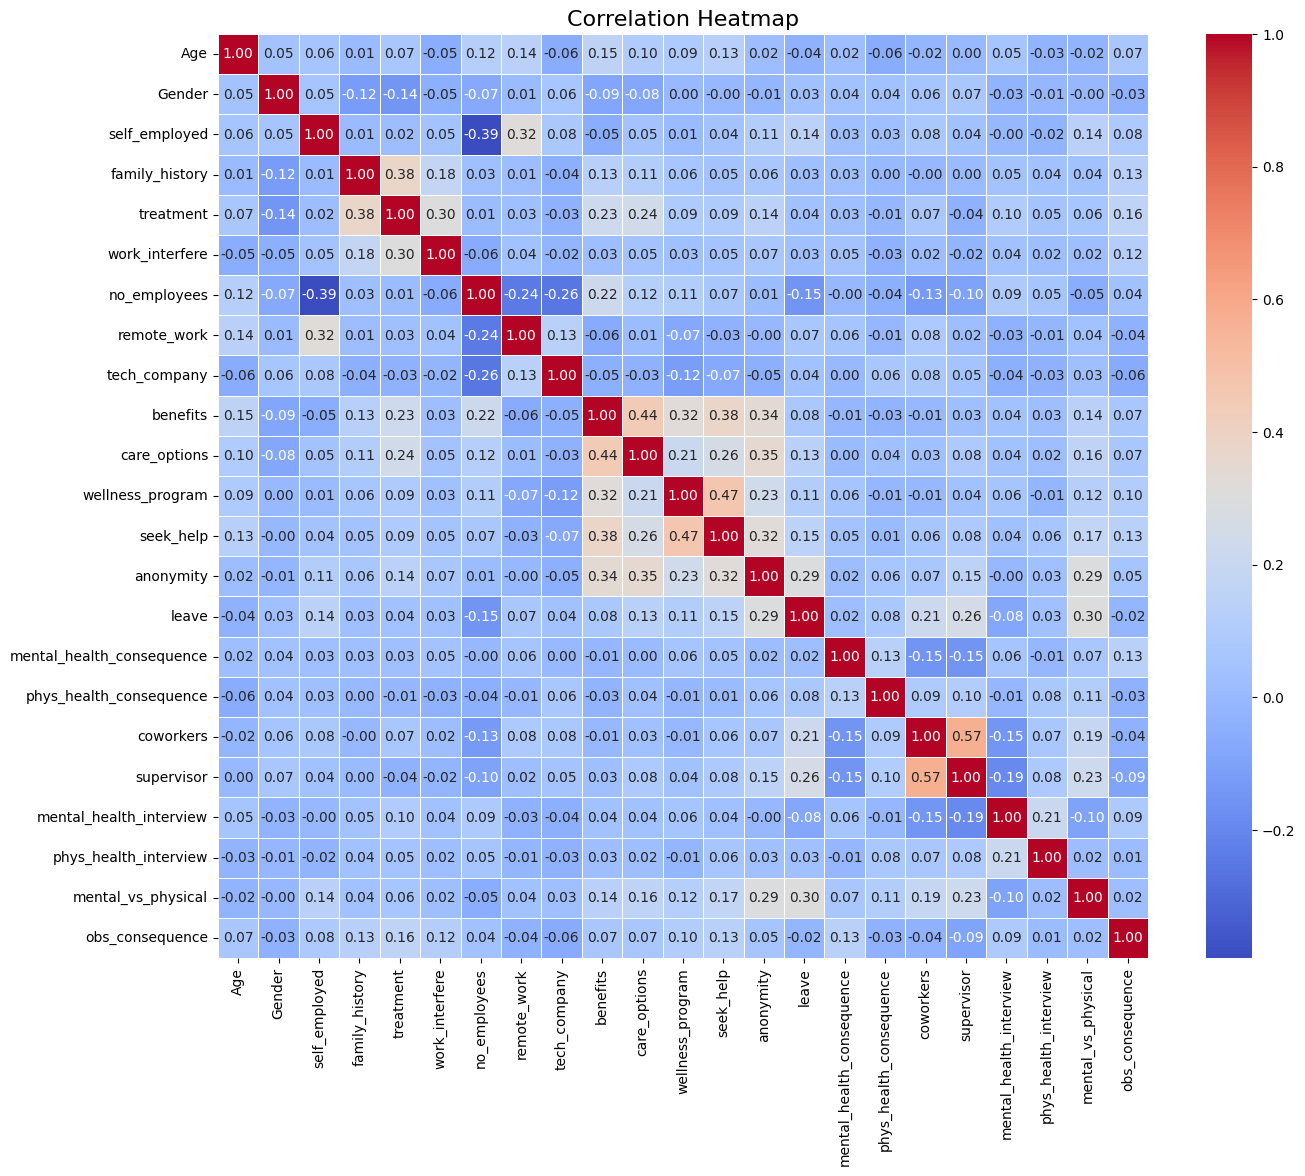

In [39]:
plt.figure(figsize=(15, 12))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", linewidths=0.5)
plt.title("Correlation Heatmap", fontsize=16)
plt.savefig("Heat Map for correlation.png")
plt.show()

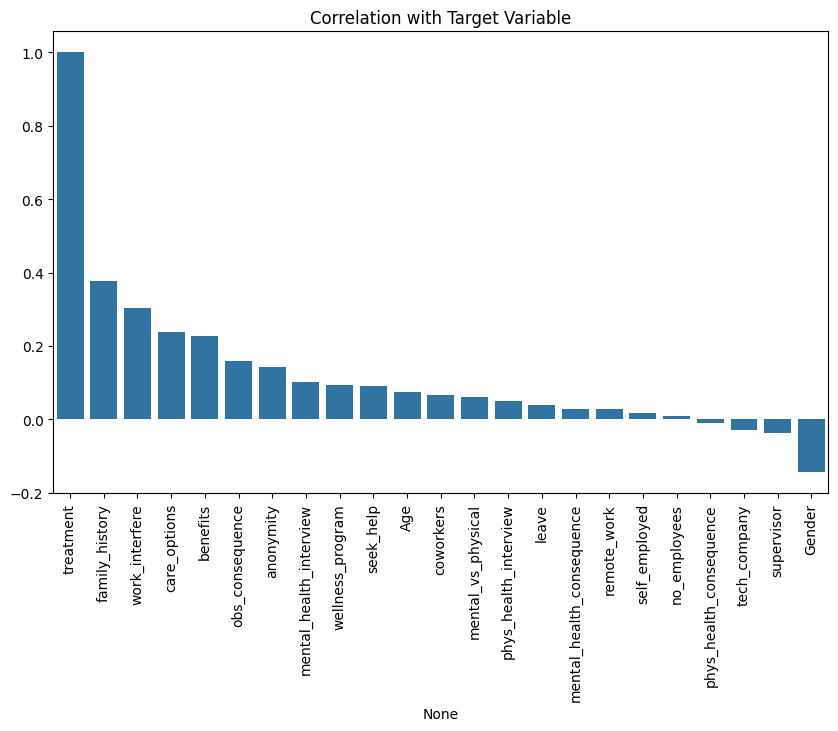

In [40]:
# visualizng the correlation with the target column
target_column = 'treatment'
target_corr = df.corr()['treatment'].sort_values(ascending=False)
plt.figure(figsize=(10, 6))
sns.barplot(x=target_corr.index, y=target_corr.values)
plt.xticks(rotation=90)
plt.title('Correlation with Target Variable')
plt.savefig('Correaltion with target variable.png') 
plt.show()

#### Model Training

In [41]:
X = df.drop(columns=["treatment"])
X = add_constant(X)  
vif_data = pd.DataFrame()
vif_data["treatment"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif_data = vif_data[vif_data["treatment"] != "const"]

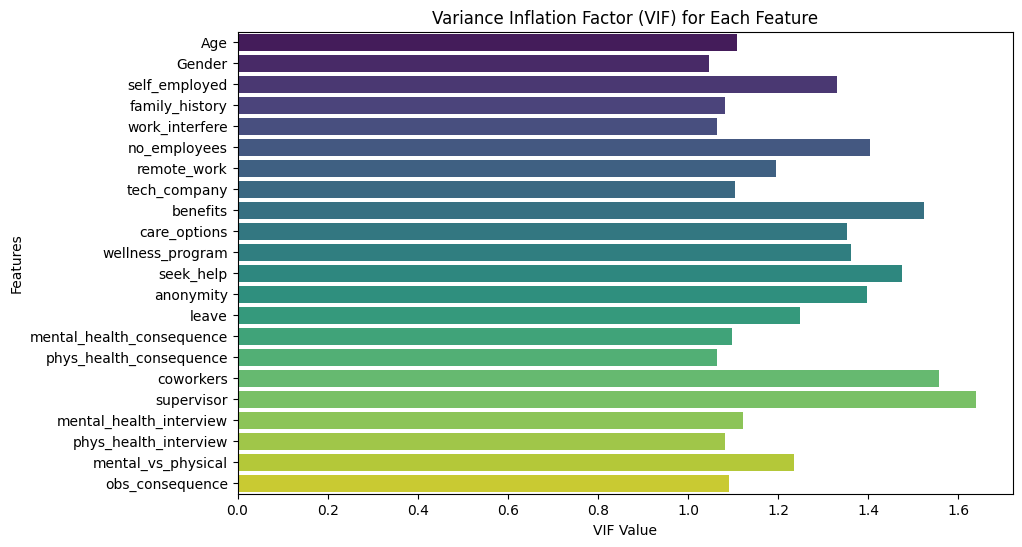

In [42]:
# Plotting the VIF values
plt.figure(figsize=(10, 6))
sns.barplot(x="VIF", y="treatment", data=vif_data, hue="treatment", palette="viridis", legend=False)
plt.title("Variance Inflation Factor (VIF) for Each Feature")
plt.xlabel("VIF Value")
plt.ylabel("Features")
plt.savefig('VIF value for each feature.png') 
plt.show()

In [43]:
vif_data

,treatment,VIF
1,Age,1.107814
2,Gender,1.046276
3,self_employed,1.330845
4,family_history,1.081200
5,work_interfere,1.064712
6,no_employees,1.403501
7,remote_work,1.195494
8,tech_company,1.105214
9,benefits,1.524136
10,care_options,1.352142


In [44]:
df.columns

Index(['Age', 'Gender', 'self_employed', 'family_history', 'treatment',
       'work_interfere', 'no_employees', 'remote_work', 'tech_company',
       'benefits', 'care_options', 'wellness_program', 'seek_help',
       'anonymity', 'leave', 'mental_health_consequence',
       'phys_health_consequence', 'coworkers', 'supervisor',
       'mental_health_interview', 'phys_health_interview',
       'mental_vs_physical', 'obs_consequence'],
      dtype='object')

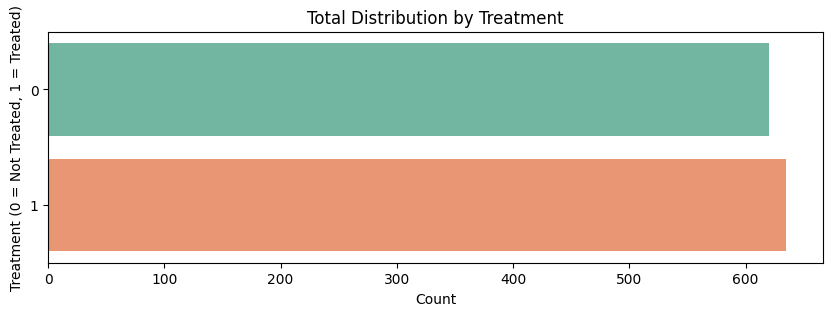

In [45]:
plt.figure(figsize=(10,3))
sns.countplot(y="treatment", hue="treatment", data=df, palette='Set2', dodge=False, legend=False)
plt.title('Total Distribution by Treatment')
plt.ylabel('Treatment (0 = Not Treated, 1 = Treated)')
plt.xlabel('Count')
plt.savefig('Total Distribution by treatment.png') 
plt.show()

In [46]:
# Dividing the datasets into training & inference 
training_data=pd.read_csv("/workspaces/Mental_Health_Prediction_in_Tech/datasets/training_data.csv")

In [47]:
X_train= training_data.drop(columns=['treatment'])
y_train= training_data['treatment']

In [48]:
X_train

,Age,Gender,self_employed,family_history,work_interfere,no_employees,remote_work,tech_company,benefits,care_options,...,anonymity,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence
0,56.0,0,1,0,1,0,1,1,0,1,...,0,0,0,0,0,0,1,1,0,0
1,28.0,1,0,1,2,5,0,1,0,0,...,0,0,0,0,1,0,1,0,0,0
2,31.0,1,0,0,2,2,0,1,2,0,...,2,3,0,1,1,1,1,0,1,0
3,30.0,1,0,1,1,1,0,1,1,2,...,0,0,1,1,0,0,1,1,0,0
4,43.0,1,0,0,1,5,0,1,2,2,...,0,3,1,1,2,2,0,2,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
999,33.0,1,0,1,2,1,0,1,1,1,...,0,3,1,1,1,2,1,1,0,0
1000,40.0,1,0,1,2,5,0,1,2,1,...,0,2,0,1,1,1,1,0,0,1
1001,36.0,0,0,1,1,5,1,1,2,2,...,2,3,0,0,1,0,1,1,0,0
1002,23.0,1,0,0,0,3,0,0,0,0,...,0,0,0,1,1,1,0,0,0,0


In [49]:
y_train

0       0
1       1
2       0
3       1
4       1
       ..
999     1
1000    1
1001    1
1002    0
1003    0
Name: treatment, Length: 1004, dtype: int64

In [50]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_train_scaled.shape

(1004, 22)

In [51]:
train_data, inference_data = train_test_split(
    df, test_size=0.2, random_state=42
)

In [52]:
# Saving the data in seperate files
train_data.to_csv('/workspaces/Mental_Health_Prediction_in_Tech/datasets/training_data.csv', index=False)
inference_data.to_csv('/workspaces/Mental_Health_Prediction_in_Tech/datasets/inference.csv', index=False)

#### Model Selection

In [53]:
# Model Selection using Logistic Regression
model_lr = LogisticRegression(random_state=43) 
model_lr.fit(X_train_scaled, y_train)

LogisticRegression(random_state=43)

In [54]:
inference_data=pd.read_csv("/workspaces/Mental_Health_Prediction_in_Tech/datasets/inference.csv")

In [55]:
X_test=inference_data.drop(columns=['treatment'])
y_test=inference_data['treatment']

In [56]:
X_test_scaled=scaler.transform(X_test)
X_test_scaled.shape

(251, 22)

In [57]:
y_pred = model_lr.predict(X_test_scaled)

In [58]:
y_pred

array([0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1,
       0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1,
       1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0,
       1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1,
       0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0,
       0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1,
       0, 0, 0, 0, 0, 1, 1, 0, 0], dtype=int64)

#### Model Evaluation

In [59]:
from sklearn.metrics import accuracy_score, classification_report
print(accuracy_score(y_test,y_pred))
print(classification_report(y_test,y_pred))

0.6972111553784861
              precision    recall  f1-score   support

           0       0.67      0.74      0.70       121
           1       0.73      0.66      0.69       130

    accuracy                           0.70       251
   macro avg       0.70      0.70      0.70       251
weighted avg       0.70      0.70      0.70       251



In [60]:
from sklearn.ensemble import RandomForestClassifier
rc=RandomForestClassifier()

In [61]:
model=rc.fit(X_train,y_train)
model

RandomForestClassifier()

In [62]:
y_pred1=model.predict(X_test)
y_pred1

array([0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1,
       0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1,
       0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0,
       1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1,
       1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0,
       0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0,
       0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0,
       0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0,
       1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0,
       0, 0, 0, 1, 0, 1, 1, 0, 0], dtype=int64)

In [63]:
from sklearn.metrics import accuracy_score, classification_report
print(accuracy_score(y_test,y_pred1))
print(classification_report(y_test,y_pred1))

0.7211155378486056
              precision    recall  f1-score   support

           0       0.71      0.72      0.71       121
           1       0.73      0.72      0.73       130

    accuracy                           0.72       251
   macro avg       0.72      0.72      0.72       251
weighted avg       0.72      0.72      0.72       251



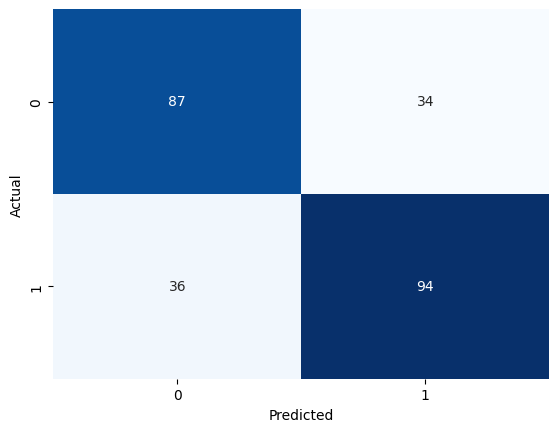

In [64]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred1)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.savefig('confusion matrix.png') 
plt.show()

#### Saving the Model

In [65]:
joblib.dump(model, "/workspaces/Mental_Health_Prediction_in_Tech/models/scaler.pkl")

['models/scaler.pkl']

In [66]:
joblib.dump(model, "/workspaces/Mental_Health_Prediction_in_Tech/models/random_forest_model.pkl")

['models/random_forest_model.pkl']